# Logistic Regression

### What is Logistic Regression
- Similar to linear regression, logistic regression is used to predict a binary outcome(1 = yes, 0 = no) based on a set of independent variables.

- In real world terms, logistic regression is used to calculate the probablility of a binart event occuring, and to deal with issues of classification. foreseeing on the off chance that an approaching email is spam or not spam, or anticipating in the event that a Visa exchange is false or not deceitful. In a clinical setting, strategic relapse might be utilized to foresee whether a cancer is harmless or threatening. In showcasing, it could be utilized to foresee if a given client (or gathering of clients) will purchase a specific item or not. An internet based instruction organization could utilize calculated relapse to foresee regardless of whether an understudy will get done with their seminar on schedule. These are all examples of the problems that logistic regression can solve in mant cases.

- By anticipatiing such results, logistic regression helps information investigators (and the organizations they work for) to settle on informed choices. At the end of the day, serves to both minimize the risk of loss and to optimize spending in order to maximize profits.

![alt text](https://rajputhimanshu.files.wordpress.com/2018/03/linear_vs_logistic_regression.jpg)

### Pros and Cons

Pros
- Logistic regression is much easier to implement than other methods, especially in the context of machine learning.

- Logistic regression works well for cases where the dataset is linearly separable.

- Logistic regression provides useful insights.

Cons
- Logistic regression fails to predict a continuous outcome.

- Logistic regression assumes linearity between the predicted (dependent) variable and the predictor (independent) variables.

- Logistic regression may not be accurate if the sample size is too small.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

We will be working with the Fish data for logistic regression so lets visualize this data.

In [2]:
df = pd.read_csv("/Users/chan/Desktop/Data Science 4/Github Repository/Datasets/Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


because we are tackling logistic regression, we want to shy away from using Linearly seperated data and use non linear seperable data to show what logisitic regression is capable of.

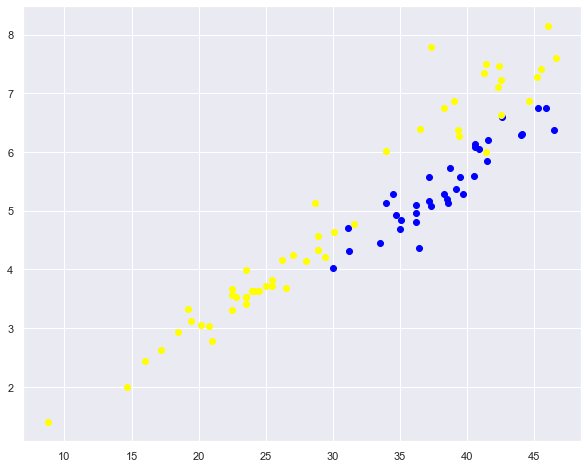

In [3]:
Bream = df[df.Species == "Bream"] # Bream
Perch = df[df.Species == "Perch"] # Perch


plt.figure(figsize = (10, 8))

plt.scatter(Bream.Length3, Bream.Width, color = "blue", label = "Bream") # X = width
plt.scatter(Perch.Length3, Perch.Width, color = "yellow", label = "Perch") # X = width

First impressions: Our data doesnt look to bad for this particular problem but there might be issues down the road since it looks like Perch fish dominates this dataset with a greater amount of individual fish.

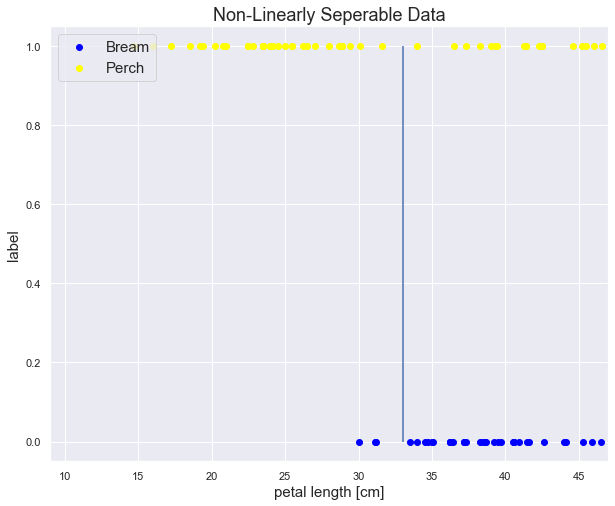

In [4]:
plt.figure(figsize = (10, 8))
plt.xlim((9, 47 ))
plt.scatter(Bream.Length3, 
            np.zeros(len(Bream.Length3)), 
            color = "blue", 
            label = "Bream")
plt.scatter(Perch.Length3, 
            np.ones(len(Perch.Length3)), 
            color = "yellow", 
            label = "Perch")
plt.vlines(33, 0, 1)
plt.xlabel("Length3", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

The purpose for our sigmoid function is to be able to map predicted values to probabilities. In another words this will predict whethere at a certain point if our fish is Bream or Perch.

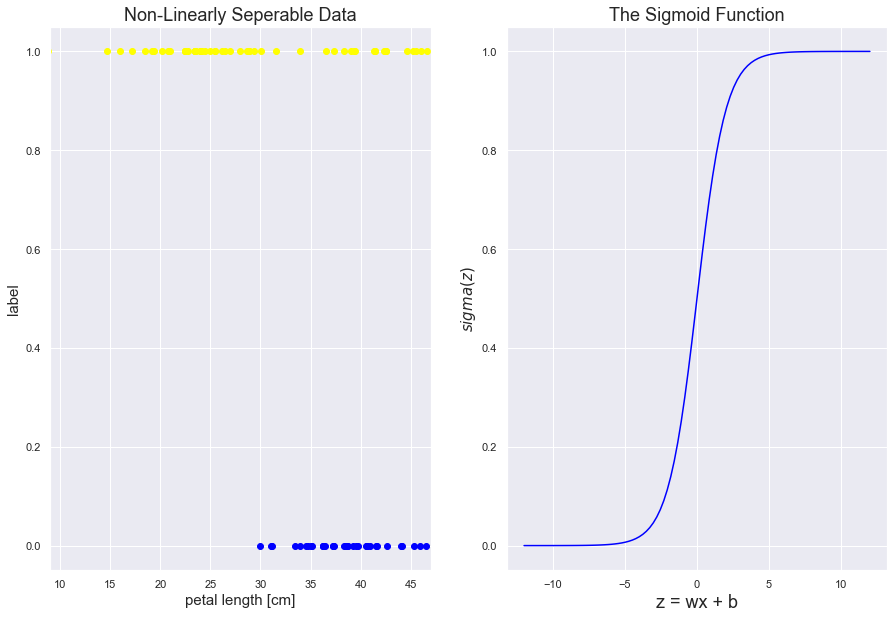

In [7]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.set_xlim((9, 47))
ax1.scatter(Bream.Length3, 
            np.zeros(len(Bream.Length3)), 
            color = "blue", 
            label = "Bream")
ax1.scatter(Perch.Length3, 
            np.ones(len(Perch.Length3)), 
            color = "yellow", 
            label = "Perch")
ax1.set_xlabel("Length3", fontsize = 15)
ax1.set_ylabel("label", fontsize = 15)
ax1.set_title("Non-Linearly Seperable Data", fontsize = 18)


domain = np.linspace(-12.0, 12.0, 100)
ax2.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
ax2.set_xlabel("z = wx + b", fontsize = 18)
ax2.set_ylabel("$sigma(z)$", fontsize = 15)
ax2.set_title("The Sigmoid Function", fontsize = 18)
plt.show()


In [8]:
class SingleNeuron(object):
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()


In [9]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

node = SingleNeuron(sigmoid, cross_entropy_loss)

X = df.Length3.values
X = X.reshape(-1, 1)
y = np.where(df.Species == "Bream", 0, 1)

node.train(X, y, alpha = 0.001, epochs = 10_000)


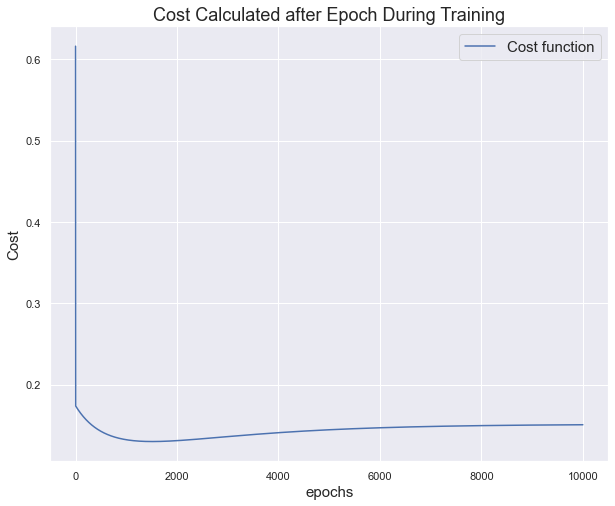

In [10]:
node.plot_cost_function()
plt.show()

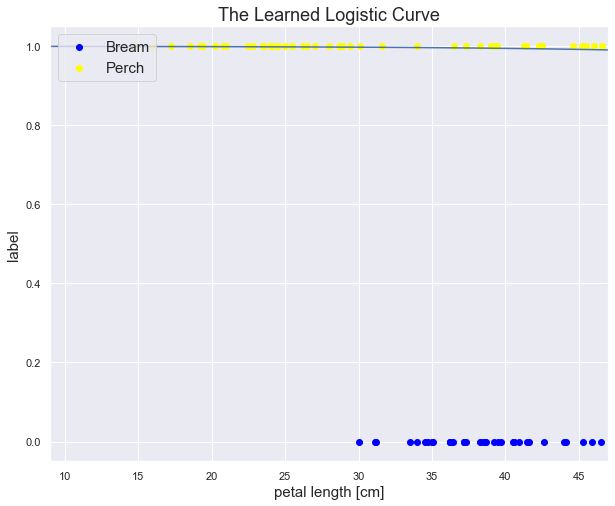

In [11]:
plt.figure(figsize = (10, 8))
plt.xlim((9, 47 ))
plt.scatter(Bream.Length3, 
            np.zeros(len(Bream.Length3)), 
            color = "blue", 
            label = "Bream")
plt.scatter(Perch.Length3, 
            np.ones(len(Perch.Length3)), 
            color = "yellow", 
            label = "Perch")

domain = np.linspace(9, 47, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Length3", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

Whats going on here and why it might not look good is because of our fish data. Since my data is heavily populated with Perch on both sides of our data it doesnt look great. Essentually it is separating our data as it should but since my data isnt the greatest its not going to look as pleasing to the eye. For better data you should get something that looks similar to our sigmoid function plot above as it runs through the seperated data perfectly.

In [12]:
node.predict(X)

array([0.99746536, 0.99721791, 0.99723942, 0.99667432, 0.9965428 ,
       0.99634991, 0.99640609, 0.996264  , 0.99623492, 0.99589974,
       0.99589974, 0.99589974, 0.99583568, 0.99553486, 0.99556933,
       0.99556933, 0.99517518, 0.99509986, 0.99506176, 0.99502336,
       0.99470533, 0.99482689, 0.99462271, 0.99423477, 0.99427921,
       0.99409937, 0.99423477, 0.99381901, 0.99377102, 0.99327022,
       0.9924431 , 0.99250125, 0.9917094 , 0.99131649, 0.99090512,
       0.99913272, 0.99880708, 0.99872063, 0.99861722, 0.99861722,
       0.9985512 , 0.99851703, 0.99844624, 0.99832068, 0.99837208,
       0.99824054, 0.99828108, 0.99828108, 0.99796069, 0.99803838,
       0.99802308, 0.99784674, 0.99761801, 0.99734451, 0.996264  ,
       0.99770872, 0.99759944, 0.99730296, 0.9965428 , 0.99466417,
       0.99278541, 0.99911224, 0.99904789, 0.99885256, 0.99871064,
       0.99859555, 0.99850546, 0.99850546, 0.99839718, 0.99817084,
       0.99782996, 0.99765472, 0.99951226, 0.99922821, 0.99914

In [13]:
np.rint(node.predict(X)) != y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [14]:
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.22012578616352202


/Users/chan/Desktop/Data Science 4/Github Repository/.venv/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


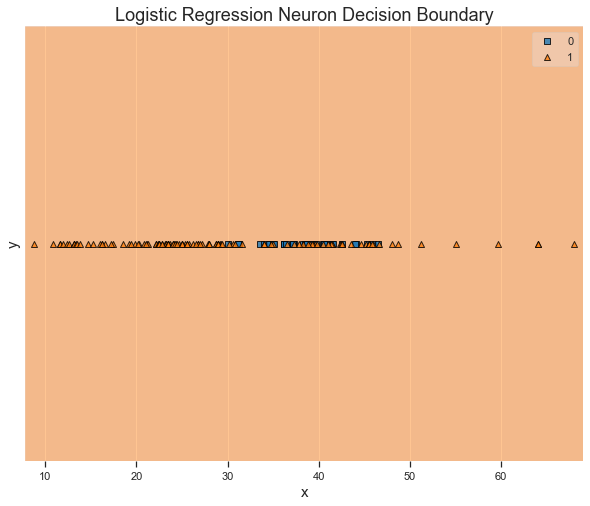

In [15]:
node.plot_decision_boundary(X, y)
plt.show()


This makes sense because of our data that is being used. Because of this your not going to get perfect splits on the data which could cause your plots to look unpleasing and what not, but the algortihm thats being ran is indeed working correctly. There is no where where Bream is on this graph where Perch isnt as well. In turn our graph is saying that there is a 100% chance of getting Perch up until getting Bream.

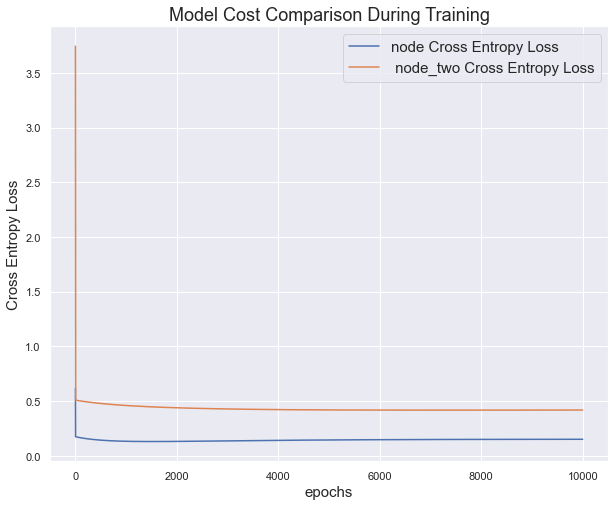

In [16]:
# Instantiate a new single neuron.
node_two = SingleNeuron(sigmoid, cross_entropy_loss)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_two = df[["Length3", "Width"]].values

# Train the new single neuron model on the new feature vectors.
node_two.train(X_two, y, alpha = 0.0001, epochs = 10_000)


plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         label = "node Cross Entropy Loss")
plt.plot(range(1, len(node_two.errors_) + 1), 
         node_two.errors_,
         label = " node_two Cross Entropy Loss")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("Cross Entropy Loss", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Model Cost Comparison During Training", fontsize = 18)


plt.show()

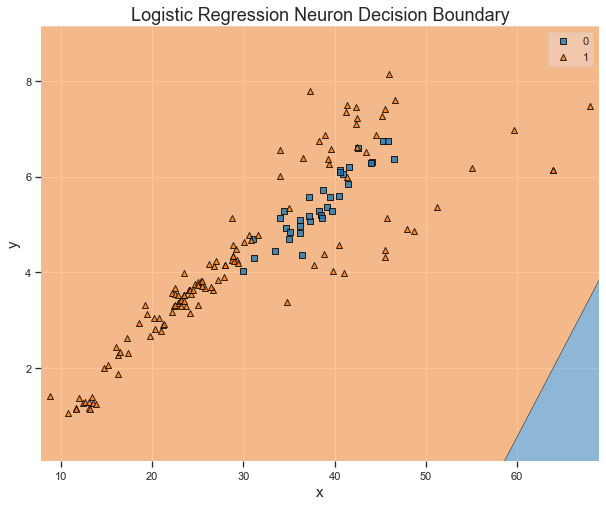

In [17]:
node_two.plot_decision_boundary(X_two, y)


Our data is trying to separate ther Bream from Perch with these new points but as we can see, our Perch is still dominating about 80% of the graph so our sigmoid function is picking a point on the graph where there is no Perch in sight, which is why it picks up the lower right corner of the graph.


In [18]:
y = np.where(df.Species == "Bream", 0, 1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])